## Apply Logistic regression to Amazon reviews dataset.


Given Dataset consists of reviews of fine foods from amazon. Reviews describe (1)product and user information, (2)ratings, and (3) a plain text review.Here, Logistic Regression algorithm is applied on amazon reviews datasets to predict whether a review is positive or negative.

Procedure to execute the above task is as follows:

* **Step1: Data Pre-processing is applied on given amazon reviews data-set.And Take sample of data from dataset because of computational limitations**


* **Step2: Time based splitting on train and test datasets.**


* **Step3: Apply  Feature generation techniques(Bow,tfidf,avg w2v,tfidfw2v)** 
  
  
* **Step4: Apply Logistic Regression algorithm using each technique.**


* **Step5: To find lambda using gridsearch cross-validation and random cross-validation**


* **Step5: L1 and L2 regularization**


* **Step6: L1 Regularization- Increase lambda hyperparameter to generate sparcity in dataset.**
          1. Report Performance metric
          2. Report Error
          3. Report Sparcity in "W*"
          
* **Step6: Feature Importance for postive and Negative reviews**
           1. Most Important Feature
           2. Bar plot of top 15 Important Features.

         

## Objective:

* To classify given reviews (positive (Rating of 4 or 5) & negative (rating of 1 or 2)) using Logistic regression algorithm.







In [1]:
# All necessary module
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#import  sys
import re
import math
import sqlite3
import pandas as pd
import numpy as np
import pickle

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import pytablewriter

from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV

# modules for text processing
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

#import scikitplot.metrics as skplt
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer


# knn modules
# train-split data,accuracy-score,cross-validation modules
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
import zipfile
archive = zipfile.ZipFile('/floyd/input/pri/Reviews.zip', 'r')
csvfile = archive.open('Reviews.csv')

In [3]:
# Reading CSV file and printing first five rows 
amz = pd.read_csv(csvfile ) # reviews.csv is  dataset file
print(amz.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1 

In [4]:
# dimensions of dataset and columns name

print(amz.shape) 
#print(amz1.shape)
print(amz.columns)

(568454, 10)
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')


The amazon reviews datafile contains 568454 rows of entry and 10 columns.For given objective, processing of data is necessary."Score" and "text" columns is processed for required result.

##### Given reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating. If score is equal to 3,it is considered as neutral score.

In [5]:
# Processing
#Give reviews with Score>3 a positive rating, and reviews with a score<3 a negative rating.

def score_part(x):
    if x < 3:
        return 'negative'
    return 'positive'

actualScore = amz['Score']
#print(actualScore)
New_score = actualScore.map(score_part)
#print(New_score)
amz['Score']=New_score

# If score is equal to 3,it is considered as neutral score.

    






In [6]:
print(amz.shape)
amz.head(5)


(568454, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...


#### Data Pre-processing on raw data:

Every datasets contains some unwanted data.Raw data is preprocessed by removing duplication.


In [7]:
#Processing of ProductId
#Sorting data according to ProductId in ascending order
sorted_data=amz.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')
#sorted_data.head() # printing sorted data
# To check the duplications in raw data
dupli=sorted_data[sorted_data.duplicated(["UserId","ProfileName","Time","Text"])]
print(dupli.head(5))
# Remove Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(amz['Id'].size*1.0)*100
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

            Id   ProductId          UserId  \
171222  171223  7310172001   AJD41FBJD9010   
171153  171154  7310172001   AJD41FBJD9010   
171151  171152  7310172001   AJD41FBJD9010   
217443  217444  7310172101  A22FICU3LCG2J1   
217444  217445  7310172101  A1LQV0PSM04DWI   

                                         ProfileName  HelpfulnessNumerator  \
171222  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     1   
171153  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
171151  N. Ferguson "Two, Daisy, Hannah, and Kitten"                     0   
217443                                      C. Knapp                     1   
217444                                 B. Feuerstein                     1   

        HelpfulnessDenominator     Score        Time  \
171222                       1  positive  1233360000   
171153                       0  positive  1233360000   
171151                       0  positive  1233360000   
217443                       1

positive    336824
negative     57107
Name: Score, dtype: int64

List of total counts Postive score and Negative score ==> [336824, 57107]


Text(0.5,1,'Total counts of Postive score and Negative score ')

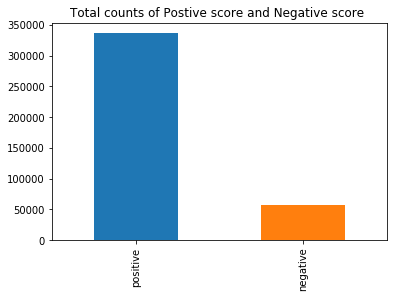

In [8]:
a=final['Score'].value_counts().tolist()
print('List of total counts Postive score and Negative score ==>',a)
final['Score'].value_counts().plot(kind='bar')
plt.title('Total counts of Postive score and Negative score ')


#### observations
* The positive reviews is greater than negative reviews.It makes data imbalanced.
* From the bar plot ,it is seen that sampled datasets of review is imbalnced.


# Text Preprocessing:

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
 
stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>$< /><')
    #cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned


cleaning html tags like" <.*?>" and punctuations like " r'[?|!|\'|"|#]',r''" from senetences

In [11]:
#final = final.sample(frac=0.004,random_state=1)
#print(final.shape)

In [12]:
#Code for implementing step-by-step the checks mentioned in the pre-processing phase.

'''Pre processing of text data:It is cleaning and flitering text'''
i=0
str1=' '
global final_string
final_string=[]
all_positive_words=[] 
all_negative_words=[] 
s=''
for sent in final['Text'].values:
    filtered_sentence=[]
    #print(sent);
    sent=cleanhtml(sent) # remove HTMl tags
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if((cleaned_words.isalpha()) & (len(cleaned_words)>2)):    
                if(cleaned_words.lower() not in stop):
                    s=(sno.stem(cleaned_words.lower())).encode('utf8')
                    filtered_sentence.append(s)
                    if (final['Score'].values)[i] == 'positive': 
                        all_positive_words.append(s) #list of all words used to describe positive reviews
                    if(final['Score'].values)[i] == 'negative':
                        all_negative_words.append(s) #list of all words used to describe negative reviews reviews
                else:
                    continue
            else:
                continue 
    #print(filtered_sentence)
    str1 = b" ".join(filtered_sentence) #final string of cleaned words
    #print("***********************************************************************")

    final_string.append(str1)
    i+=1
print('all_positive_words =',len(all_positive_words))
print('all_negative_words =',len(all_negative_words))

# Finding most frequently occuring Positive and Negative words 

freq_positive=nltk.FreqDist(all_positive_words)

freq_negative=nltk.FreqDist(all_negative_words)

print("\nMost Common Positive Words : ",freq_positive.most_common(20))

print("\nMost Common Negative Words : ",freq_negative.most_common(20))




all_positive_words = 12908031
all_negative_words = 2338974

Most Common Positive Words :  [(b'like', 159742), (b'tast', 148220), (b'flavor', 124991), (b'good', 124949), (b'use', 114020), (b'love', 112681), (b'product', 112391), (b'great', 107709), (b'one', 106238), (b'tri', 95717), (b'tea', 91571), (b'coffe', 88533), (b'make', 81463), (b'get', 80711), (b'food', 70743), (b'would', 66136), (b'amazon', 62151), (b'time', 60604), (b'buy', 60076), (b'realli', 59528)]

Most Common Negative Words :  [(b'tast', 34433), (b'like', 32256), (b'product', 29435), (b'one', 20379), (b'flavor', 19479), (b'would', 17893), (b'tri', 17664), (b'use', 15260), (b'good', 14940), (b'coffe', 14602), (b'get', 13747), (b'buy', 13673), (b'order', 12829), (b'food', 12692), (b'dont', 11677), (b'tea', 11606), (b'amazon', 11230), (b'even', 10975), (b'box', 10779), (b'make', 9810)]


In [11]:
pickle_path_final_string='final_string.pkl'
final_string_unpkl=open(pickle_path_final_string,'rb')
final_string=pickle.load(final_string_unpkl)

In [12]:

final['CleanedText']=final_string
#adding a column of CleanedText which displays the data after pre-processing of the review 
Pre_Process_Data = final[['CleanedText','Score']] 

X_Text=Pre_Process_Data ['CleanedText']

Y_Score =Pre_Process_Data ['Score'] # positive or negative score
print('\nPre_Process_Text_Data  X_Text=',X_Text.shape)
print('\nPre_Process_Score_Data Y_Score=',Y_Score.shape)



Pre_Process_Text_Data  X_Text= (393931,)

Pre_Process_Score_Data Y_Score= (393931,)


In [13]:
# postive and negtive reviews from original datasets of amazon
pos_final = final[final.Score == 'positive']# postive reviews
pos_final = pos_final.sample(frac=0.3)
print(pos_final.Score.value_counts())

neg_final = final[final.Score == 'negative'] # negative reviews
print(neg_final.Score.value_counts())

positive    101047
Name: Score, dtype: int64
negative    57107
Name: Score, dtype: int64


In [14]:
final_pos_neg = pd.concat([pos_final,neg_final],axis=0)
print(len(final_pos_neg))
print(type(final_pos_neg))
#print('final_pos_neg=',final_pos_neg['Score'])

158154
<class 'pandas.core.frame.DataFrame'>


In [15]:
print(final_pos_neg.columns)

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'CleanedText'],
      dtype='object')


### Splitting Training and Testing dataset based on Time

In [16]:
# splitting training and testing dataset
#final_pos_neg= final_pos_neg.sample(frac=0.07,random_state=1)
X1 = final_pos_neg[['Text','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#50k data sample
X=X1[:40000]
print(X.shape)
Y1 = final_pos_neg[['Score','Time']].sort_values('Time',axis=0).drop('Time',axis=1)
#50k data sample
Y=Y1[:40000]
Y = Y['Score'].map(lambda x: 1 if x == 'positive' else 0).values
print(Y.shape)
## 70 % of data
tt =math.ceil(len(X)*.7)
print(tt)

X_train_data =  X[:tt] 
X_train_data  = X_train_data
print('X_train_data ',X_train_data.shape)
X_test_data = X[tt:]
X_test_data = X_test_data
print('X_test_data ',X_test_data.shape )
Y_train_data = Y[:tt]
Y_train_data  = Y_train_data
print('Y_train_data ',Y_train_data.shape )
Y_test_data = Y[tt:]
Y_test_data= Y_test_data
print('Y_test_data ',Y_test_data .shape)



(40000, 1)
(40000,)
28000
X_train_data  (28000, 1)
X_test_data  (12000, 1)
Y_train_data  (28000,)
Y_test_data  (12000,)


#### Unix timestamp
The column *Time* is based on unix timestamp.The unix time stamp is a way to track time as a running total of seconds and In time technically does not change no matter where you are located on the globe. This is very useful to computer systems for tracking and sorting dated information in dynamic and distributed applications both online and client side. https://www.unixtimestamp.com/

So here,time conversion is not necessary to process on amazon data.But following code will describe the date and time for human consideration.Time data is arranged according to year-month-day-hours-minute-seconds in descending order .

In [19]:
# conversion of unix timestamp to human readable 
import datetime
s=sorted_data['Time'].values.tolist() # convert pandas series into list
print(len(s))
ram=[]
for i in range(len(s)):
    
    #print(s[i])

    z=datetime.datetime.fromtimestamp(s[i]).strftime('%Y-%m-%d %H:%M:%S')
    # conversion formula of unix timestamp to yy-mm-dd-hh-mm-ss
    
    ram.append(z)
    #print(z)
print(ram[0:5])


568454
['2005-02-15 00:00:00', '2007-10-04 00:00:00', '2007-11-11 00:00:00', '2008-05-15 00:00:00', '2008-06-01 00:00:00']


#  Optimal Lambda for Logistic Regression

In [20]:
models_performence = {
    'Model':[],
    'Vectorizer': [],
    'SearchCV':[],
    'Scoring Metrics': [],
    'Train_model_score': [],
    'Test_model_score': [],
    'best panalty': [],
    'Best lambda':[],
}

columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
pd.DataFrame(models_performence, columns=columns)
     
   

,Model,Vectorizer,SearchCV,Scoring Metrics,Train_model_score,Test_model_score,best panalty,Best lambda


In [17]:
 # Time seris splitting Cross-Validation
tscv = TimeSeriesSplit(n_splits=10)

In [22]:
#  lambda_LR is function to calculate the lambda value using 'L2' for Logistic Regression
def lambda_LR(X_train,y_train,X_test, y_test,vectorization):
    #  regularization penalty space
    penalty = ['l1']
    #  regularization hyperparameter distribution using uniform distribution
    C1 = uniform(loc=0, scale=4)
    C = np.logspace(0, 4, 10)
    #  hyperparameter options
    hp1 =dict(C=C, penalty=penalty)
    hp = dict(C=C1, penalty=penalty)
    # Scoring options
    d = ['accuracy','precision','recall','f1']
   
    for i in range(len(d)):
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        models_performence['SearchCV'].append('GridSearchCV')
        #print('for GridSearchCV') 
        p = d[i]
        models_performence['Scoring Metrics'].append(p)
        model1 = GridSearchCV(LogisticRegression(), hp1, scoring = p, cv=tscv,n_jobs= -1)
        best_model1=model1.fit(X_train, y_train)
        
        Test_model_score=model1.score(X_test, y_test)
        Train_model_score=model1.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
        models_performence['Test_model_score'].append(Test_model_score.mean())
        
       # Reg1=best_model1.best_estimator_.get_params()['penalty']
       
        models_performence['best panalty'].append('l1')
        optimal_l1=best_model1.best_estimator_.get_params()['C']
        
        models_performence['Best lambda'].append(optimal_l1)
        
        
        
        #print('For RandomsearchCV')
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        
        models_performence['SearchCV'].append('RandomsearchCV')
        
        model2 = RandomizedSearchCV(LogisticRegression(),hp,scoring = p, cv=tscv,n_jobs= -1)
        # Fit randomized search
        best_model2 = model2.fit(X_train,y_train)
        
        models_performence['Scoring Metrics'].append(p)
        #print(model2.best_estimator_)
        Test_model_score2=model2.score(X_test, y_test)
        Train_model_score=model2.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
       
        models_performence['Test_model_score'].append(Test_model_score2.mean())
        #Reg2=best_model2.best_estimator_.get_params()['penalty']
        
        models_performence['best panalty'].append('l1')
        optimal_l2=best_model2.best_estimator_.get_params()['C']
       
        
        models_performence['Best lambda'].append(optimal_l2)
        
        
       

In [23]:
#  lambda_LR is function to calculate the lambda value using'L2' for Logistic Regression
def lambda_LR1(X_train,y_train,X_test, y_test,vectorization):
    #  regularization penalty space
    penalty = ['l2']
    #  regularization hyperparameter distribution using uniform distribution
    C1 = uniform(loc=0, scale=4)
    C = np.logspace(0, 4, 10)
    #  hyperparameter options
    hp1 =dict(C=C, penalty=penalty)
    hp = dict(C=C1, penalty=penalty)
    # Scoring options
    d = ['accuracy','precision','recall','f1'] 
    
    for i in range(len(d)):
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        models_performence['SearchCV'].append('GridSearchCV')
        #print('for GridSearchCV') 
        p = d[i]
        models_performence['Scoring Metrics'].append(p)
        model1 = GridSearchCV(LogisticRegression(), hp1, scoring = p, cv=tscv,n_jobs= -1)
        best_model1=model1.fit(X_train, y_train)
        
        Test_model_score=model1.score(X_test, y_test)
        Train_model_score=model1.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
        models_performence['Test_model_score'].append(Test_model_score.mean())
        
        #Reg1=best_model1.best_estimator_.get_params()['penalty']
       
        models_performence['best panalty'].append('l2')
        optimal_l1=best_model1.best_estimator_.get_params()['C']
        
        models_performence['Best lambda'].append(optimal_l1)
        
        
        
        #print('For RandomsearchCV')
        models_performence['Model'].append('Logistic Regression')
        models_performence['Vectorizer'].append(vectorization)
        
        models_performence['SearchCV'].append('RandomsearchCV')
        
        model2 = RandomizedSearchCV(LogisticRegression(),hp,scoring = p, cv=tscv,n_jobs= -1)
        # Fit randomized search
        best_model2 = model2.fit(X_train,y_train)
        
        models_performence['Scoring Metrics'].append(p)
        #print(model2.best_estimator_)
        Test_model_score2=model2.score(X_test, y_test)
        Train_model_score=model2.score(X_train, y_train)
        models_performence['Train_model_score'].append(Train_model_score.mean())
       
        models_performence['Test_model_score'].append(Test_model_score2.mean())
        #Reg2=best_model2.best_estimator_.get_params()['penalty']
        
        models_performence['best panalty'].append('l2')
        optimal_l2=best_model2.best_estimator_.get_params()['C']
       
        
        models_performence['Best lambda'].append(optimal_l2)
        
        
       

##### lambda_LR
* lambda_LR is function to calculate the optimal lambda value for Logistic Regression.
* GridsearchCV and RandomsearchCV method are used to obtain optimal lambda with L1&L2 penality,different scoring options(e.g,accuracy,precision,recall and F1-score) and broad range of lambda.
* Best parameter lambda and penalty for which model performs very well is obatained.


##### Pandas dataframe to markdown Table format

In [24]:
# result_display  is function to convert dataframe into table format in Markdown
def result_display(df):
    writer = pytablewriter.MarkdownTableWriter()
    #writer.table_name = name
    writer.header_list = list(df.columns.values)
    writer.value_matrix = df.values.tolist()
    writer.write_table()


    

# Methods to convert text into vector

Methods:
* Bag of Words
* Avg word2vec
* Tf-idf
* tf-idf weighted Word2Vec

Using above four method is used to convert text to numeric vector.

# 1. Bag of Words (BoW)

##### BOW for Training Data

In [25]:
count_vect = CountVectorizer() #in scikit-learn

In [26]:
#vector of train data
data = count_vect.fit_transform(X_train_data.values.astype('U').ravel())
data.get_shape()

final_data = StandardScaler(with_mean=False).fit_transform(data )
print(final_data.shape)
    

(28000, 33270)


#### Dumping & Loading Pickle file for training data ( BOW )


In [27]:
#Pickle file for training data
pickle_path_BOW_train='X_train_data_BOW.pkl'
X_train_data_BOW=open(pickle_path_BOW_train,'wb')
pickle.dump(final_data ,X_train_data_BOW)
X_train_data_BOW.close()


In [28]:

pickle_path_BOW_train='X_train_data_BOW.pkl'
unpickle_path1=open(pickle_path_BOW_train,'rb')
final_data=pickle.load(unpickle_path1)


##### BOW for Testing Data

In [29]:
final_data1=count_vect.transform(X_test_data.values.ravel())
#print(final_data1)
final_data_test = StandardScaler(with_mean=False).fit_transform(final_data1)
print(final_data_test.shape)

(12000, 33270)


#### Dumping & Loading Pickle file for testing data ( BOW) 

In [30]:
pickle_path_BOW_test='X_test_data_BOW.pkl'
X_test_data_BOW=open(pickle_path_BOW_test,'wb')
pickle.dump(final_data_test ,X_test_data_BOW)
X_test_data_BOW.close()

In [31]:
pickle_path_BOW_test='X_test_data_BOW.pkl'
unpickle_path2=open(pickle_path_BOW_test,'rb')
final_data_test=pickle.load(unpickle_path2)

 Featured data of Bag of words is Standardization (mean=0 and std.dev=1).

In [17]:
Train_data=Y_train_data

#### Optimal lambda using BOW (l1 regularization)

In [33]:
# To get optimal lambda using BOW
vectorization='BOW'
optimal_lambda = lambda_LR(final_data ,Train_data,final_data_test,Y_test_data,vectorization )

#### Optimal lambda using BOW (l2 regularization)

In [34]:
# To get optimal lambda using BOW

vectorization='BOW'
optimal_lambda = lambda_LR1(final_data ,Train_data,final_data_test,Y_test_data,vectorization )

#### Dumping & loading model-performance in pickle format(BOW)

In [35]:
pickle_path_BOW_lambda='optimal_lambda_BOW.pkl'
optimal_lambda_BOW=open(pickle_path_BOW_lambda,'wb')
pickle.dump(models_performence,optimal_lambda_BOW)
optimal_lambda_BOW.close()


In [36]:
pickle_path_BOW_lambda='optimal_lambda_BOW.pkl'
unpickle_path11=open(pickle_path_BOW_lambda,'rb')
models_performence22=pickle.load(unpickle_path11)

In [37]:
columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score", "Test_model_score", "best panalty","Best lambda"]
df=pd.DataFrame(models_performence22, columns=columns)
    

In [38]:
result_display(df)

|       Model       |Vectorizer|   SearchCV   |Scoring Metrics|Train_model_score|Test_model_score|best panalty|Best lambda|
|-------------------|----------|--------------|---------------|----------------:|---------------:|------------|----------:|
|Logistic Regression|BOW       |GridSearchCV  |accuracy       |           0.9993|          0.8206|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|accuracy       |           0.9917|          0.8477|l1          |     0.1599|
|Logistic Regression|BOW       |GridSearchCV  |precision      |           0.9993|          0.8587|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|precision      |           0.9912|          0.8725|l1          |     0.1387|
|Logistic Regression|BOW       |GridSearchCV  |recall         |           0.9997|          0.8791|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|recall         |           0.9983|          0.8933|l1          |     0.3494|
|Logisti

|       Model       |Vectorizer|   SearchCV   |Scoring Metrics|Train_model_score|Test_model_score|best panalty|Best lambda|
|-------------------|----------|--------------|---------------|----------------:|---------------:|------------|----------:|
|Logistic Regression|BOW       |GridSearchCV  |accuracy       |           0.9993|          0.8206|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|accuracy       |           0.9917|          0.8477|l1          |     0.1599|
|Logistic Regression|BOW       |GridSearchCV  |precision      |           0.9993|          0.8587|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|precision      |           0.9912|          0.8725|l1          |     0.1387|
|Logistic Regression|BOW       |GridSearchCV  |recall         |           0.9997|          0.8791|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|recall         |           0.9983|          0.8933|l1          |     0.3494|
|Logistic Regression|BOW       |GridSearchCV  |f1             |           0.9995|          0.8691|l1          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|f1             |           0.9995|          0.8692|l1          |     0.9742|
|Logistic Regression|BOW       |GridSearchCV  |accuracy       |           0.9999|          0.8016|l2          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|accuracy       |           0.9997|          0.8082|l2          |     0.3761|
|Logistic Regression|BOW       |GridSearchCV  |precision      |           1.0000|          0.8389|l2          |    21.5443|
|Logistic Regression|BOW       |RandomsearchCV|precision      |           0.9938|          0.8578|l2          |     0.0108|
|Logistic Regression|BOW       |GridSearchCV  |recall         |           1.0000|          0.8688|l2          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|recall         |           0.9990|          0.8934|l2          |     0.0497|
|Logistic Regression|BOW       |GridSearchCV  |f1             |           0.9999|          0.8554|l2          |     1.0000|
|Logistic Regression|BOW       |RandomsearchCV|f1             |           0.9999|          0.8560|l2          |     0.8697|


Above table describes the performance of model with different scoring techniques and regularization techniques with best Cross-validation search techniques.

# L1 Regularization
#####  Increase lambda hyperparameter to generate sparcity in dataset.


The optimal number of lambda is 0.


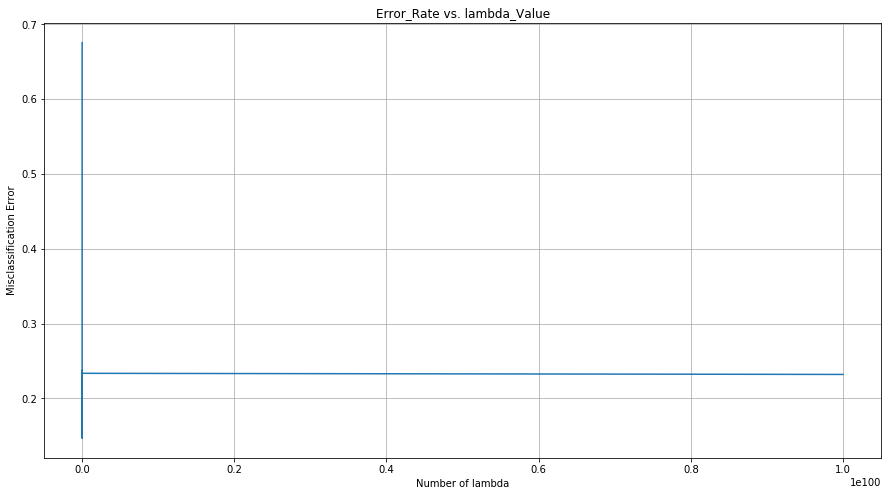

the misclassification error for each lambda_Value is :  [0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675
 0.675 0.675 0.675 0.675 0.147 0.209 0.223 0.231 0.228 0.228 0.234 0.229
 0.232 0.231 0.231 0.235 0.23  0.235 0.23  0.23  0.234 0.231 0.229 0.234
 0.237 0.233 0.23  0.235 0.233 0.232 0.233 0.233 0.23  0.229 0.233 0.235
 0.234 0.232]
Sparsity == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8247, 16627, 22818, 29899, 32907, 33146, 33226, 33256, 33265, 33269, 33270, 33265, 33270, 33269, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270, 33270]


In [39]:
C2 = np.logspace(-50, 100, 50)
hp2= list(C2)
socore=[]
Sparsity=[]

for vect_data in range(len(hp2)):
    r=hp2[vect_data]
    clf = LogisticRegression(C=r, penalty='l1')
    clf.fit(final_data ,Train_data)
    w1 = clf.coef_
    #print(np.count_nonzero(w1))
    Sparsity.append(np.count_nonzero(w1))
    w = clf.coef_.ravel()
    model_score=clf.score(final_data_test,Y_test_data)
    socore.append(model_score)

MSE = [1 - x for x in socore]
global optimal_k
optimal_k = hp2[MSE.index(min(MSE))]
print('\nThe optimal number of lambda is %d.' % optimal_k)



  # plot misclassification error vs k 
plt.figure(figsize=(15,8))
plt.plot(hp2, MSE)
plt.grid()
#for xy in zip(hp2, np.round(MSE,3)):
#    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.title('Error_Rate vs. lambda_Value')
plt.xlabel('Number of lambda')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each lambda_Value is : ", np.round(MSE,3))

#print(socore)
print('Sparsity ==',Sparsity)

#### Observations:
* Sparsity of data increases as Increase in lambda hyperparameter.
* L1 regularization is used for calculating sparsityof datasets.
* The graph of error rate vs lambda value is shown above.



## GridSearchCV with L2 regularization (BOW)

In [40]:
df=pd.DataFrame(models_performence22, columns=columns)
zx=df[df['best panalty'] == 'l2']
zx=zx[zx['SearchCV']=='GridSearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']
#print(SearchCV)


Model                Logistic Regression
Vectorizer                           BOW
SearchCV                    GridSearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.868846
best panalty                          l2
Best lambda                            1
Name: 12, dtype: object


In [41]:
#Best lambda and best penalty
hp1=dict(C=[lambdax], penalty=[best_panalty])
LR =GridSearchCV(LogisticRegression(), hp1, scoring =Scoring_Metrics, cv=tscv)
LR.fit(final_data ,Train_data)

prediction1 = LR.predict(final_data_test)



In [42]:
#Training accuracy and training error
training_score=LR.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 1.0
training error is = 0.0


In [43]:
# Testing Accuracy and testing error for LogisticRegression model

Testing_score=round(accuracy_score(Y_test_data ,prediction1),5)
print("Accuracy for Logistic Regression model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Bag of words is = ",Testing_error)

Accuracy for Logistic Regression model with Bag of words is =  0.80158
Testing error for Logistic Regression model with Bag of words is =  0.19842000000000004


In [44]:
F1_score = round(f1_score(Y_test_data ,prediction1,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction1,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction1,average='macro'),5)*100

In [45]:
print(classification_report( Y_test_data,prediction1))

             precision    recall  f1-score   support

          0       0.71      0.66      0.68      3895
          1       0.84      0.87      0.86      8105

avg / total       0.80      0.80      0.80     12000



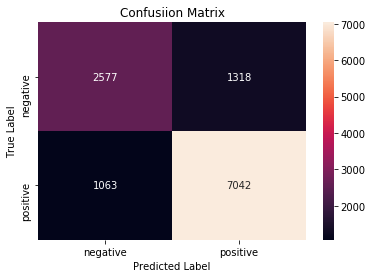

In [46]:
cm = confusion_matrix(Y_test_data ,prediction1)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:

models_performence1 = {
    'Model':['Logistic Regression'],   
    'Vectorizer': ['BoW'],
    'SearchCV':[SearchCV],
    'Best penalty':[best_panalty],
    'Optimal lambda': [lambdax],
    'Training error':[training_error*100],
    'Test error':[Testing_error*100],
    'Accuracy':[Testing_score],
    'F1':[F1_score],
    'recall':[recall],
    'precision':[precision]
    
  
}

In [48]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df1=pd.DataFrame(models_performence1, columns=columns)

In [49]:
result_display(df1)

|       Model       |Vectorizer|  SearchCV  |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV|l2          |             1|             0|     19.84|  0.8016|76.97| 76.52|    77.52|



|       Model       |Vectorizer|  SearchCV  |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV|l2          |             1|             0|     19.84|  0.8016|76.97| 76.52|    77.52|

## RandomsearchCV with L2 regularization (BOW)

In [50]:
#RandomsearchCV
zx=df[df['best panalty'] == 'l2']
zx=zx[zx['SearchCV']=='RandomsearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']
#print(SearchCV)

Model                Logistic Regression
Vectorizer                           BOW
SearchCV                  RandomsearchCV
Scoring Metrics                   recall
Train_model_score               0.999046
Test_model_score                0.893399
best panalty                          l2
Best lambda                    0.0497333
Name: 13, dtype: object


In [51]:
#Best lambda and best penalty
C1 = uniform(loc=0, scale=lambdax)
hp2=dict(C=C1, penalty=[best_panalty])
LR2 =RandomizedSearchCV(LogisticRegression(), hp2, scoring =Scoring_Metrics, cv=tscv)
LR2.fit(final_data ,Train_data)

prediction2 = LR2.predict(final_data_test)
lambda_new=LR2.best_params_['C']

In [52]:
#Training accuracy and training error
training_score=LR2.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.9955312311709179
training error is = 0.004468768829082093


In [53]:
# Testing Accuracy and testing error for LogisticRegression model

Testing_score=round(accuracy_score(Y_test_data ,prediction2),5)
print("Accuracy for Logistic Regression model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Bag of words is = ",Testing_error)

Accuracy for Logistic Regression model with Bag of words is =  0.846
Testing error for Logistic Regression model with Bag of words is =  0.15400000000000003


In [54]:
F1_score = round(f1_score(Y_test_data ,prediction2,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction2,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction2,average='macro'),5)*100

In [55]:
print(classification_report( Y_test_data,prediction2))

             precision    recall  f1-score   support

          0       0.81      0.68      0.74      3895
          1       0.86      0.92      0.89      8105

avg / total       0.84      0.85      0.84     12000



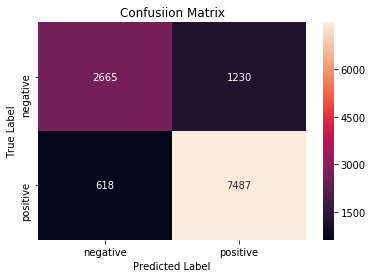

In [56]:
cm = confusion_matrix(Y_test_data ,prediction2)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [57]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('BOW')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambda_new)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)

In [58]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df3=pd.DataFrame(models_performence1, columns=columns)

In [59]:
result_display(df3)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|         0.000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|         0.447|     15.40|  0.8460|81.63| 80.40|    83.53|



|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|         0.000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|         0.447|     15.40|  0.8460|81.63| 80.40|    83.53|

## GridSearchCV with L1 regularization (BOW)

In [60]:
zx=df[df['best panalty'] == 'l1']
zx=zx[zx['SearchCV']=='GridSearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']
#print(SearchCV)

Model                Logistic Regression
Vectorizer                           BOW
SearchCV                    GridSearchCV
Scoring Metrics                   recall
Train_model_score               0.999749
Test_model_score                0.879087
best panalty                          l1
Best lambda                            1
Name: 4, dtype: object


In [61]:

hp3=dict(C=[lambdax], penalty=[best_panalty])

LR3 =GridSearchCV(LogisticRegression(), hp3, scoring = Scoring_Metrics, cv=tscv)

LR3.fit(final_data ,Train_data)

prediction3 = LR3.predict(final_data_test)

In [62]:
#Training accuracy and training error
training_score=LR3.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.9997489455713999
training error is = 0.00025105442860007265


In [63]:
# Testing Accuracy and testing error for LogisticRegression model
Testing_score=round(accuracy_score(Y_test_data ,prediction3),5)
print("Accuracy for Logistic Regression model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Bag of words is = ",Testing_error)

Accuracy for Logistic Regression model with Bag of words is =  0.82075
Testing error for Logistic Regression model with Bag of words is =  0.17925000000000002


In [64]:
F1_score = round(f1_score(Y_test_data ,prediction3,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction3,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction3,average='macro'),5)*100

In [65]:
print(classification_report( Y_test_data,prediction3))

             precision    recall  f1-score   support

          0       0.74      0.70      0.72      3895
          1       0.86      0.88      0.87      8105

avg / total       0.82      0.82      0.82     12000



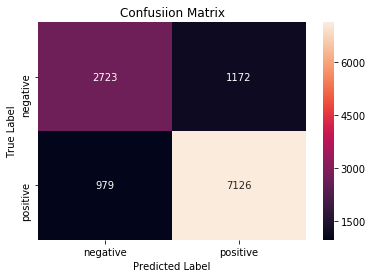

In [66]:
cm = confusion_matrix(Y_test_data ,prediction3)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [67]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('BOW')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambdax)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)


In [68]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df4=pd.DataFrame(models_performence1, columns=columns)

In [69]:
result_display(df4)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |         1.000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |         0.004|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |         1.000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|



|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |         1.000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |         0.004|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |         1.000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|

## RandomsearchCV with L1 regularization (BOW)

In [70]:
#RandomsearchCV

zx=df[df['best panalty'] == 'l1']
zx=zx[zx['SearchCV']=='RandomsearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']
#print(SearchCV)

Model                Logistic Regression
Vectorizer                           BOW
SearchCV                  RandomsearchCV
Scoring Metrics                   recall
Train_model_score               0.998343
Test_model_score                0.893276
best panalty                          l1
Best lambda                     0.349364
Name: 5, dtype: object


In [71]:
#Best lambda and best penalty
C1 = uniform(loc=0, scale=lambdax)
hp4=dict(C=C1, penalty=[best_panalty])
LR4 =RandomizedSearchCV(LogisticRegression(), hp2, scoring =Scoring_Metrics, cv=tscv)
LR4.fit(final_data ,Train_data)

prediction4 = LR4.predict(final_data_test)
lambda_new=LR4.best_params_['C']

In [72]:
#Training accuracy and training error
training_score=LR4.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.991765414741916
training error is = 0.00823458525808396


In [73]:
# Testing Accuracy and testing error for LogisticRegression model
Testing_score=round(accuracy_score(Y_test_data ,prediction4),5)
print("Accuracy for Logistic Regression model with Bag of words is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Bag of words is = ",Testing_error)

Accuracy for Logistic Regression model with Bag of words is =  0.8505
Testing error for Logistic Regression model with Bag of words is =  0.14949999999999997


In [74]:
F1_score = round(f1_score(Y_test_data ,prediction4,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction4,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction4,average='macro'),5)*100

In [75]:
print(classification_report( Y_test_data,prediction4))

             precision    recall  f1-score   support

          0       0.85      0.65      0.74      3895
          1       0.85      0.95      0.90      8105

avg / total       0.85      0.85      0.84     12000



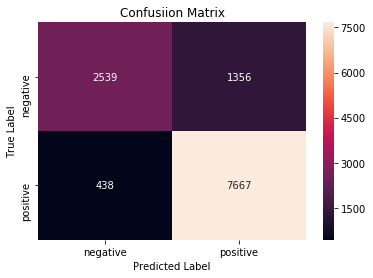

In [76]:
cm = confusion_matrix(Y_test_data ,prediction4)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [77]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('BOW')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambda_new)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)

In [78]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df5=pd.DataFrame(models_performence1, columns=columns)

In [79]:
result_display(df5)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|       0.00000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|       0.44688|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|       0.02511|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|       0.82346|     14.95|  0.8505|81.71| 79.89|    85.13|



|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|       0.00000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|       0.44688|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|       0.02511|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|       0.82346|     14.95|  0.8505|81.71| 79.89|    85.13|


#### Dumping & Loading models_performence1 obtained by BOW

In [80]:
pickle_path_BOW_final_result='optimal_lambda_BOW_final_result.pkl'
optimal_lambda_BOW_final_result1=open(pickle_path_BOW_final_result,'wb')
pickle.dump(models_performence1,optimal_lambda_BOW_final_result1)
optimal_lambda_BOW_final_result1.close()

In [81]:
pickle_path_BOW_final_result='optimal_lambda_BOW_final_result.pkl'
unpickle_path_final=open(pickle_path_BOW_final_result,'rb')
models_performence122=pickle.load(unpickle_path_final)

### Observations:
* Logistic Regression with BOW using GridsearchCV & RandomSearchCV for L1 & L2 regularization techniques is used to get optimal lambda .
* Scoring metrics's values is good for Optimal Penalty l2 & randomsearchCV 
* Training error is minimum here but test error is high compartively with training error. 

# 2. tf-idf


In [82]:
##### TF-IDF for Training data

In [83]:
models_performence = {
    'Model':[],
    'Vectorizer': [],
    'SearchCV':[],
    'Scoring Metrics': [],
    'Train_model_score': [],
    'Test_model_score': [],
    'best panalty': [],
    'Best lambda':[],
}

columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
pd.DataFrame(models_performence, columns=columns)
     
   

,Model,Vectorizer,SearchCV,Scoring Metrics,Train_model_score,Test_model_score,best panalty,Best lambda


In [18]:

tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(X_train_data.values.astype('U').ravel())
final_tf_idf.get_shape()

(28000, 530093)

In [19]:
features = tf_idf_vect.get_feature_names()
len(features)

530093

In [21]:
final_tfidf_np = StandardScaler(with_mean=False).fit_transform(final_tf_idf )

#### Dumping & Loading Pickle file for training data (TF-IDF)

In [26]:
pickle_path_tfidf_train='X_train_data_tfidf.pkl'
X_train_data_tfidf=open(pickle_path_tfidf_train,'wb')
pickle.dump(final_tfidf_np ,X_train_data_tfidf)
X_train_data_tfidf.close()

In [27]:
pickle_path_tfidf_train='X_train_data_tfidf.pkl'
unpickle_path5=open(pickle_path_tfidf_train,'rb')
final_tfidf_np=pickle.load(unpickle_path5)

##### tf-idf For Testing datasets 

In [22]:
final_tf_idf_test = tf_idf_vect.transform(X_test_data.values.astype('U').ravel())
final_tf_idf_test.get_shape()

(12000, 530093)

In [23]:
final_tfidf_np_test = StandardScaler(with_mean=False).fit_transform(final_tf_idf_test )

#### Dumping & Loading Pickle file for testing data(TF-IDF)

In [30]:

pickle_path_tfidf_test='X_test_data_tfidf.pkl'
X_test_data_tfidf=open(pickle_path_tfidf_test,'wb')
pickle.dump(final_tfidf_np_test ,X_test_data_tfidf)
X_test_data_tfidf.close()

In [31]:
pickle_path_tfidf_test='X_test_data_tfidf.pkl'
unpickle_path6=open(pickle_path_tfidf_test,'rb')
final_tfidf_np_test=pickle.load(unpickle_path6)

In [93]:
vectorization='TF-IDF'
optimal_lambda = lambda_LR(final_tfidf_np ,Train_data,final_tfidf_np_test,Y_test_data,vectorization)

In [94]:
vectorization='TF-IDF'
optimal_lambda = lambda_LR1(final_tfidf_np ,Train_data,final_tfidf_np_test,Y_test_data,vectorization)

In [95]:
pickle_path_tfidf_lambda='optimal_lambda_tfidf.pkl'
optimal_lambda_tfidf=open(pickle_path_tfidf_lambda,'wb')
pickle.dump(models_performence,optimal_lambda_tfidf)
optimal_lambda_tfidf.close()


In [96]:
pickle_path_tfidf_lambda='optimal_lambda_tfidf.pkl'
unpickle_path232=open(pickle_path_tfidf_lambda,'rb')
models_performence232=pickle.load(unpickle_path232)

In [97]:
columns = ["Model","Vectorizer","SearchCV", "Scoring Metrics","Train_model_score","Test_model_score", "best panalty","Best lambda"]
df6=pd.DataFrame(models_performence232, columns=columns)

In [98]:
result_display(df6)

|       Model       |Vectorizer|   SearchCV   |Scoring Metrics|Train_model_score|Test_model_score|best panalty|Best lambda|
|-------------------|----------|--------------|---------------|----------------:|---------------:|------------|----------:|
|Logistic Regression|TF-IDF    |GridSearchCV  |accuracy       |                1|          0.8667|l1          |     2.7826|
|Logistic Regression|TF-IDF    |RandomsearchCV|accuracy       |                1|          0.8654|l1          |     3.9285|
|Logistic Regression|TF-IDF    |GridSearchCV  |precision      |                1|          0.8669|l1          |     2.7826|
|Logistic Regression|TF-IDF    |RandomsearchCV|precision      |                1|          0.8673|l1          |     2.4854|
|Logistic Regression|TF-IDF    |GridSearchCV  |recall         |                1|          0.9662|l1          |    59.9484|
|Logistic Regression|TF-IDF    |RandomsearchCV|recall         |                1|          0.9477|l1          |     2.9219|
|Logisti

|       Model       |Vectorizer|   SearchCV   |Scoring Metrics|Train_model_score|Test_model_score|best panalty|Best lambda|
|-------------------|----------|--------------|---------------|----------------:|---------------:|------------|----------:|
|Logistic Regression|TF-IDF    |GridSearchCV  |accuracy       |                1|          0.8667|l1          |     2.7826|
|Logistic Regression|TF-IDF    |RandomsearchCV|accuracy       |                1|          0.8654|l1          |     3.9285|
|Logistic Regression|TF-IDF    |GridSearchCV  |precision      |                1|          0.8669|l1          |     2.7826|
|Logistic Regression|TF-IDF    |RandomsearchCV|precision      |                1|          0.8673|l1          |     2.4854|
|Logistic Regression|TF-IDF    |GridSearchCV  |recall         |                1|          0.9662|l1          |    59.9484|
|Logistic Regression|TF-IDF    |RandomsearchCV|recall         |                1|          0.9477|l1          |     2.9219|
|Logistic Regression|TF-IDF    |GridSearchCV  |f1             |                1|          0.9057|l1          |     2.7826|
|Logistic Regression|TF-IDF    |RandomsearchCV|f1             |                1|          0.9044|l1          |     2.6000|
|Logistic Regression|TF-IDF    |GridSearchCV  |accuracy       |                1|          0.8247|l2          | 10000.0000|
|Logistic Regression|TF-IDF    |RandomsearchCV|accuracy       |                1|          0.8225|l2          |     3.8382|
|Logistic Regression|TF-IDF    |GridSearchCV  |precision      |                1|          0.8060|l2          | 10000.0000|
|Logistic Regression|TF-IDF    |RandomsearchCV|precision      |                1|          0.8028|l2          |     3.5410|
|Logistic Regression|TF-IDF    |GridSearchCV  |recall         |                1|          0.9771|l2          |     1.0000|
|Logistic Regression|TF-IDF    |RandomsearchCV|recall         |                1|          0.9798|l2          |     0.0122|
|Logistic Regression|TF-IDF    |GridSearchCV  |f1             |                1|          0.8825|l2          | 10000.0000|
|Logistic Regression|TF-IDF    |RandomsearchCV|f1             |                1|          0.8812|l2          |     3.9405|

Above table shows the Performance of Logistic Regression using TF-IDF for various Cross-validation techniques,scoring techniques . 

# L1 Regularization
#####  Increase lambda hyperparameter to generate sparcity in dataset.


The optimal number of lambda is 0.


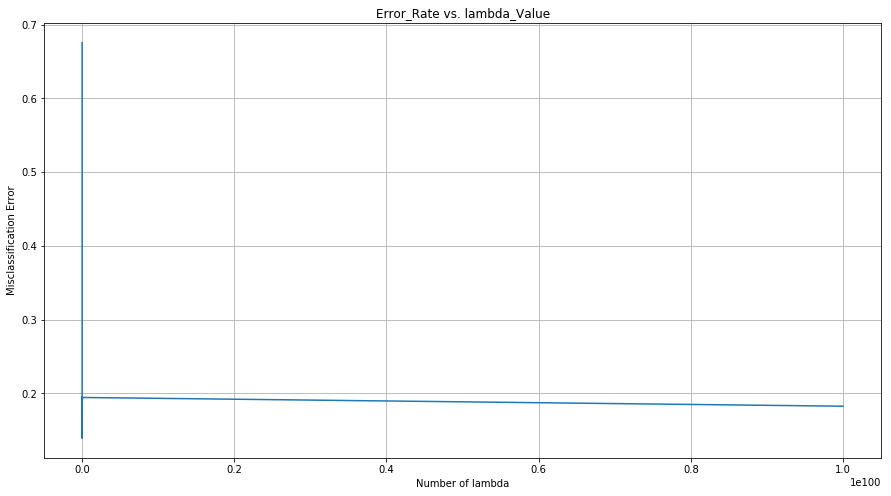

the misclassification error for each lambda_Value is :  [0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675 0.675
 0.675 0.675 0.675 0.675 0.139 0.15  0.189 0.191 0.191 0.184 0.188 0.189
 0.189 0.193 0.19  0.185 0.194 0.19  0.19  0.192 0.191 0.19  0.185 0.187
 0.192 0.188 0.188 0.189 0.19  0.19  0.188 0.188 0.192 0.188 0.195 0.189
 0.194 0.182]
Sparsity == [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 20775, 129532, 522482, 529286, 529282, 529288, 529287, 529286, 529291, 529291, 529285, 529287, 529294, 529290, 529289, 529287, 529288, 529290, 529286, 529289, 529287, 529288, 529285, 529289, 529287, 529290, 529286, 529292, 529288, 529289, 529287, 529286, 529283, 529292]


In [99]:
C2 = np.logspace(-50, 100, 50)
hp2= list(C2)
socore=[]
Sparsity=[]

for vect_data in range(len(hp2)):
    r=hp2[vect_data]
    clf = LogisticRegression(C=r, penalty='l1')
    clf.fit(final_tfidf_np ,Train_data)
    w1 = clf.coef_
    #print(np.count_nonzero(w1))
    Sparsity.append(np.count_nonzero(w1))
    w = clf.coef_.ravel()
    model_score=clf.score(final_tfidf_np_test,Y_test_data)
    socore.append(model_score)

MSE = [1 - x for x in socore]
global optimal_k
optimal_k = hp2[MSE.index(min(MSE))]
print('\nThe optimal number of lambda is %d.' % optimal_k)



  # plot misclassification error vs k 
plt.figure(figsize=(15,8))
plt.plot(hp2, MSE)
plt.grid()
#for xy in zip(hp2, np.round(MSE,3)):
#    plt.annotate('(%s, %s)' % xy, xy=xy, textcoords='data')
plt.title('Error_Rate vs. lambda_Value')
plt.xlabel('Number of lambda')
plt.ylabel('Misclassification Error')
plt.show()

print("the misclassification error for each lambda_Value is : ", np.round(MSE,3))

#print(socore)
print('Sparsity ==',Sparsity)

In [100]:
df2=pd.DataFrame(models_performence232, columns=columns)
#print(df2)

## RandomsearchCV with L2 regularization (Tf-IDf)

In [101]:
#L2 regularization

zx=df2[df2['best panalty'] == 'l2']

zx=zx[zx['SearchCV']=='RandomsearchCV']

zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']

Model                Logistic Regression
Vectorizer                        TF-IDF
SearchCV                  RandomsearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.979766
best panalty                          l2
Best lambda                    0.0122481
Name: 13, dtype: object


In [102]:
#Best lambda and best penalty
C1 = uniform(loc=0, scale=lambdax)
hp5=dict(C=C1, penalty=[best_panalty])
LR5 =RandomizedSearchCV(LogisticRegression(), hp5, scoring =Scoring_Metrics, cv=tscv)
LR5.fit(final_data ,Train_data)

prediction5 = LR5.predict(final_data_test)
lambda_new=LR5.best_params_['C']

In [103]:
#Training accuracy and training error
training_score=LR5.score(final_data,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 0.991564571199036
training error is = 0.00843542880096404


In [104]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction5),5)
print("Accuracy for Logistic Regression model with Avg word2vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Avg word2vec is = ",Testing_error)

Accuracy for Logistic Regression model with Avg word2vec is =  0.84908
Testing error for Logistic Regression model with Avg word2vec is =  0.15092000000000005


In [105]:
F1_score = round(f1_score(Y_test_data ,prediction5,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction5,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction5,average='macro'),5)*100

In [106]:
print(classification_report( Y_test_data,prediction5))

             precision    recall  f1-score   support

          0       0.86      0.64      0.73      3895
          1       0.85      0.95      0.89      8105

avg / total       0.85      0.85      0.84     12000



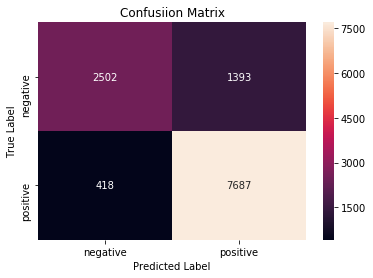

In [107]:
cm = confusion_matrix(Y_test_data ,prediction5)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [108]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('TF-IDF')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambda_new)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)

In [109]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df7=pd.DataFrame(models_performence1, columns=columns)

In [110]:
result_display(df7)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |       1.00000|       0.00000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |       0.00419|       0.44688|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |       1.00000|       0.02511|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |       0.00053|       0.82346|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |       0.00041|       0.84354|     15.09|  0.8491|81.44| 79.54|    85.17|



|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |       1.00000|       0.00000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |       0.00419|       0.44688|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |       1.00000|       0.02511|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |       0.00053|       0.82346|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |       0.00041|       0.84354|     15.09|  0.8491|81.44| 79.54|    85.17|

## GridSearchCV with L2 regularization (Tf-IDf)

In [111]:
zx=df[df['best panalty'] == 'l2']
zx=zx[zx['SearchCV']=='GridSearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']

Model                Logistic Regression
Vectorizer                           BOW
SearchCV                    GridSearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.868846
best panalty                          l2
Best lambda                            1
Name: 12, dtype: object


In [112]:
#Best lambda and best penalty
hp6=dict(C=[lambdax], penalty=[best_panalty])
LR6 =GridSearchCV(LogisticRegression(), hp6, scoring =Scoring_Metrics, cv=tscv)

LR6 .fit(final_tfidf_np ,Train_data)

prediction6 = LR6.predict(final_tfidf_np_test)



In [113]:
#Training accuracy and training error
training_score=LR6.score(final_tfidf_np,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 1.0
training error is = 0.0


In [114]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction6),5)
print("Accuracy for Logistic Regression model with Avg word2vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Avg word2vec is = ",Testing_error)

Accuracy for Logistic Regression model with Avg word2vec is =  0.8195
Testing error for Logistic Regression model with Avg word2vec is =  0.1805


In [115]:
F1_score = round(f1_score(Y_test_data ,prediction6,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction6,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction6,average='macro'),5)*100

In [116]:
print(classification_report( Y_test_data,prediction6))

             precision    recall  f1-score   support

          0       0.91      0.49      0.64      3895
          1       0.80      0.98      0.88      8105

avg / total       0.84      0.82      0.80     12000



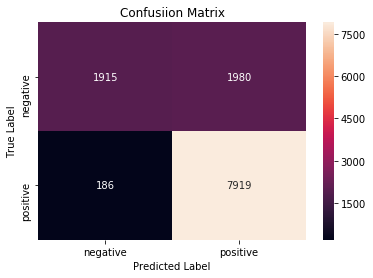

In [117]:
cm = confusion_matrix(Y_test_data ,prediction6)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [118]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('TF-IDF')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambdax)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)


In [119]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df8=pd.DataFrame(models_performence1, columns=columns)

In [120]:
result_display(df8)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |  

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |        1.0000|        0.0000|     18.05|  0.8195|75.92| 73.43|    85.57|

## RandomsearchCV with L1 regularization (Tf-IDf)

In [121]:
zx=df2[df2['best panalty'] == 'l1']
zx=zx[zx['SearchCV']=='RandomsearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']

Model                Logistic Regression
Vectorizer                        TF-IDF
SearchCV                  RandomsearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.947687
best panalty                          l1
Best lambda                      2.92194
Name: 5, dtype: object


In [122]:
#Best lambda and best penalty
C1 = uniform(loc=0, scale=lambdax)
hp7=dict(C=C1, penalty=[best_panalty])
LR7 =RandomizedSearchCV(LogisticRegression(), hp7, scoring =Scoring_Metrics, cv=tscv)

LR7.fit(final_tfidf_np ,Train_data)

prediction7 = LR7.predict(final_tfidf_np_test)
lambda_new=LR7.best_params_['C']

In [123]:
#Training accuracy and training error
training_score=LR7.score(final_tfidf_np,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 1.0
training error is = 0.0


In [124]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction7),5)
print("Accuracy for Logistic Regression model with Avg word2vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Avg word2vec is = ",Testing_error)

Accuracy for Logistic Regression model with Avg word2vec is =  0.864
Testing error for Logistic Regression model with Avg word2vec is =  0.136


In [125]:
F1_score = round(f1_score(Y_test_data ,prediction7,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction7,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction7,average='macro'),5)*100

In [126]:
print(classification_report( Y_test_data,prediction7))

             precision    recall  f1-score   support

          0       0.86      0.69      0.77      3895
          1       0.86      0.95      0.90      8105

avg / total       0.86      0.86      0.86     12000



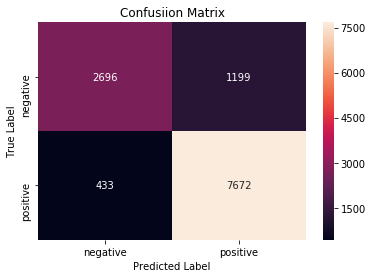

In [127]:
cm = confusion_matrix(Y_test_data ,prediction7)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [128]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('TF-IDF')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambda_new)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)


In [129]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df9=pd.DataFrame(models_performence1, columns=columns)

In [130]:
result_display(df9)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |  

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |        1.0000|        0.0000|     18.05|  0.8195|75.92| 73.43|    85.57|
|Logistic Regression|TF-IDF    |RandomsearchCV|l1          |        2.8581|        0.0000|     13.60|  0.8640|83.58| 81.94|    86.32|

## GridSearchCV with L1 regularization (Tf-IDf)

In [131]:
zx=df2[df2['best panalty'] == 'l1']
zx=zx[zx['SearchCV']=='GridSearchCV']
zx= zx.ix[zx['Test_model_score'].idxmax()]
print(zx)
lambdax=zx['Best lambda']

best_panalty=zx['best panalty']

Scoring_Metrics =zx['Scoring Metrics']
SearchCV=zx['SearchCV']

Model                Logistic Regression
Vectorizer                        TF-IDF
SearchCV                    GridSearchCV
Scoring Metrics                   recall
Train_model_score                      1
Test_model_score                0.966194
best panalty                          l1
Best lambda                      59.9484
Name: 4, dtype: object


In [132]:
#Best lambda and best penalty

hp8=dict(C=[lambdax], penalty=[best_panalty])
LR8 =GridSearchCV(LogisticRegression(), hp8, scoring =Scoring_Metrics, cv=tscv)

LR8.fit(final_tfidf_np ,Train_data)

prediction8 = LR8.predict(final_tfidf_np_test)


In [133]:
#Training accuracy and training error
training_score=LR8.score(final_tfidf_np,Train_data)
print('training accuracy=',training_score)
training_error=1-training_score
print('training error is =',training_error)

training accuracy= 1.0
training error is = 0.0


In [134]:
# Testing Accuracy and testing error for knn model

Testing_score=round(accuracy_score(Y_test_data ,prediction8),5)
print("Accuracy for Logistic Regression model with Avg word2vec is = ",Testing_score)
Testing_error=1-Testing_score
print("Testing error for Logistic Regression model with Avg word2vec is = ",Testing_error)

Accuracy for Logistic Regression model with Avg word2vec is =  0.83867
Testing error for Logistic Regression model with Avg word2vec is =  0.16132999999999997


In [135]:
F1_score = round(f1_score(Y_test_data ,prediction8,average='macro'),5)*100
recall = round(recall_score(Y_test_data,prediction8,average='macro'),5)*100
precision = round(precision_score(Y_test_data ,prediction8,average='macro'),5)*100

In [136]:
print(classification_report( Y_test_data,prediction8))

             precision    recall  f1-score   support

          0       0.89      0.58      0.70      3895
          1       0.83      0.97      0.89      8105

avg / total       0.85      0.84      0.83     12000



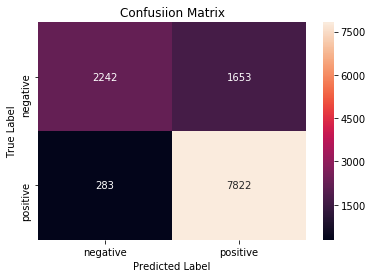

In [137]:
cm = confusion_matrix(Y_test_data ,prediction8)
label = ['negative', 'positive']
df_conf = pd.DataFrame(cm, index = label, columns = label)
sns.heatmap(df_conf, annot = True, fmt = "d")
plt.title("Confusiion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [138]:
models_performence1['Model'].append('Logistic Regression')
models_performence1['Vectorizer'].append('TF-IDF')
models_performence1['SearchCV'].append(SearchCV)
models_performence1['Best penalty'].append(best_panalty)
models_performence1[ 'Optimal lambda'].append(lambdax)
models_performence1['Training error'].append(training_error*100)
models_performence1[ 'Test error'].append(Testing_error*100)
models_performence1[ 'Accuracy'].append(Testing_score)
models_performence1[ 'F1'].append(F1_score)
models_performence1['recall'].append(recall)
models_performence1[ 'precision'].append(precision)


In [139]:
columns = ["Model","Vectorizer","SearchCV", "Best penalty","Optimal lambda", "Training error",  "Test error",
            "Accuracy","F1","recall","precision",
          ]
df10=pd.DataFrame(models_performence1, columns=columns)

In [140]:
result_display(df10)

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------:|-------------:|---------:|-------:|----:|-----:|--------:|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |  

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------|-------------|---------|-------|----|-----|--------|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |        1.0000|        0.0000|     18.05|  0.8195|75.92| 73.43|    85.57|
|Logistic Regression|TF-IDF    |RandomsearchCV|l1          |        2.8581|        0.0000|     13.60|  0.8640|83.58| 81.94|    86.32|
|Logistic Regression|TF-IDF    |GridSearchCV  |l1          |       59.9484|        0.0000|     16.13|  0.8387|79.42| 77.03|    85.67|

## Feature Importance for Logistic Regression

#### Feature importance using count_vect

In [141]:
model = LogisticRegression( random_state=0, class_weight='balanced')
model.fit(final_data ,Train_data)
# Calculate feature importances
count_vect_feature=count_vect.get_feature_names()
feature_importance = model.coef_[0]
print(feature_importance)

[-6.98856785e-02  3.20812169e-02  6.86907874e-02 ... -1.16301296e-05
 -1.97800637e-05 -3.77890206e-04]


In [142]:
Negative_Feature_Importance= feature_importance[-15:]
print('Negative_Feature_Importanc',Negative_Feature_Importance)
Positive_Feature_Importance= feature_importance[:15]
print('Positive_Feature_Importance',Positive_Feature_Importance)

Negative_Feature_Importanc [ 1.27846516e-03 -8.72952486e-06 -2.72293848e-02 -5.07093351e-02
  2.14312914e-03  3.31203513e-02  5.10959783e-02  1.26563767e-01
  5.70493934e-02  4.62499125e-04 -2.63228160e-02  4.98604711e-03
 -1.16301296e-05 -1.97800637e-05 -3.77890206e-04]
Positive_Feature_Importance [-6.98856785e-02  3.20812169e-02  6.86907874e-02 -1.33611151e-06
 -2.24748457e-05 -2.31786264e-05  1.33332202e-01 -2.16687646e-01
 -1.58712686e-06 -1.97722162e-01  1.17074106e-03  4.31862077e-03
  2.52835784e-02  8.86442954e-03 -1.02991746e-02]


Top 15 negative class feature to               -0.666154
waste            -0.674955
doesn            -0.678214
worse            -0.688182
information      -0.689716
way              -0.711875
threw            -0.730362
terrible         -0.756894
under            -0.756945
stale            -0.787371
disappointment   -0.807016
was              -0.856012
awful            -0.865418
worst            -1.116509
not              -1.737925
dtype: float64


Text(0,0.5,'Relative Feature Importance for Negative class ')

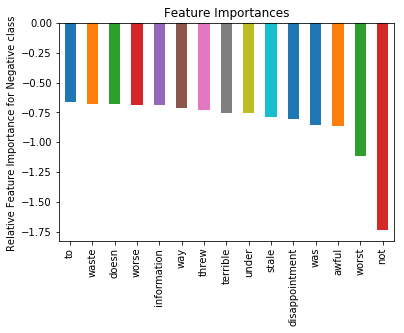

In [143]:
# Relative Feature Importance for Negative class using BOW
feat_imp = pd.Series(feature_importance, count_vect_feature).sort_values(ascending=False)
print("Top 15 negative class feature",feat_imp[-15:])

feat_imp[-15:].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Negative class ')


Top 15 postive class feature great        2.131231
good         1.479342
best         1.275140
perfect      1.129655
love         1.021882
and          1.005843
tasty        0.919905
excellent    0.914646
favorite     0.848755
delicious    0.804589
awesome      0.729551
moist        0.715587
friend       0.698840
yummy        0.695703
quite        0.683189
dtype: float64


Text(0,0.5,'Relative Feature Importance for Postive class ')

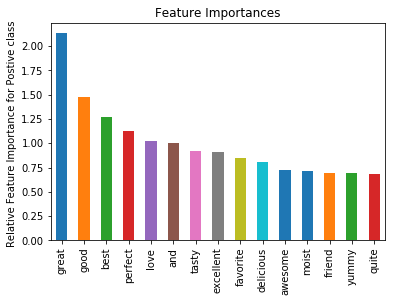

In [144]:
#Feature Importances for postive class using count_vect

feat_imp = pd.Series(feature_importance, count_vect_feature).sort_values(ascending=False)
print("Top 15 postive class feature",feat_imp[:15])

feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Postive class ')


#### Feature importance using tf-idf -vect

In [24]:
model = LogisticRegression(random_state=0, class_weight='balanced')
model.fit(final_tfidf_np ,Train_data)
tf_idf_feature=tf_idf_vect .get_feature_names()
feature_importance = model.coef_[0]
print(feature_importance)

[-0.01572257  0.00070768  0.0042909  ...  0.00199084  0.00199084
  0.00166962]


In [25]:
Negative_Feature_Importance= feature_importance[-15:]
print('Negative_Feature_Importance',Negative_Feature_Importance)
Positive_Feature_Importance= feature_importance[:15]
print('Positive_Feature_Importance',Positive_Feature_Importance)

Negative_Feature_Importance [ 0.00035824 -0.00379201  0.00235019 -0.00700736  0.00038112  0.00038112
  0.0004987   0.0004987  -0.00161642 -0.00161642  0.00279301  0.00279301
  0.00199084  0.00199084  0.00166962]
Positive_Feature_Importance [-1.57225749e-02  7.07681090e-04  4.29090014e-03 -2.18493818e-03
 -8.80539569e-03  6.26167688e-04 -2.36090761e-03  1.81293314e-03
 -6.95264014e-03 -8.43264570e-03 -5.53123811e-05 -4.95346097e-03
  6.96913050e-05 -2.49085370e-03 -1.09552802e-03]


Top 15 negative class feature did not             -0.053815
way too             -0.054299
terrible            -0.055495
very disappointed   -0.056223
not buy             -0.056270
stale               -0.056943
awful               -0.057589
not recommend       -0.060131
disappointed        -0.062147
at all              -0.065745
the worst           -0.066788
would not           -0.069012
worst               -0.069726
not worth           -0.079154
not                 -0.087908
dtype: float64


Text(0,0.5,'Relative Feature Importance for Negative class ')

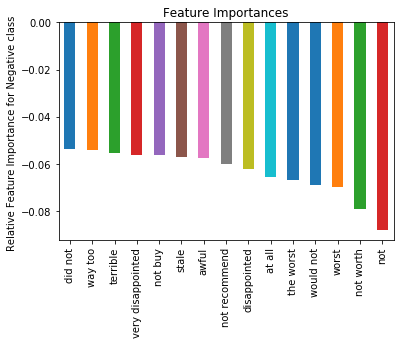

In [26]:
# Relative Feature Importance for Negative class using tf_idf
feat_imp = pd.Series(feature_importance,tf_idf_feature).sort_values(ascending=False)
print("Top 15 negative class feature",feat_imp[-15:])

feat_imp[-15:].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Negative class ')


Top 15 postive class feature great        0.149660
love         0.105626
and          0.104531
best         0.103081
the best     0.100451
good         0.095941
is           0.085983
delicious    0.076961
this is      0.076417
for          0.076384
excellent    0.075110
is great     0.072469
love this    0.072014
my           0.069634
are          0.065415
dtype: float64


Text(0,0.5,'Relative Feature Importance for Postive class ')

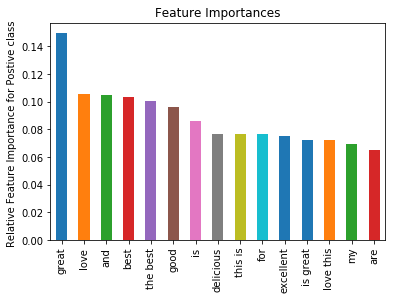

In [27]:
#Feature Importances for postive class using tf_idf

feat_imp = pd.Series(feature_importance, tf_idf_feature).sort_values(ascending=False)
print("Top 15 postive class feature",feat_imp[:15])

feat_imp[:15].plot(kind='bar', title='Feature Importances')
plt.ylabel('Relative Feature Importance for Postive class ')


#### Observations
* Feature Importance for logistic regression using BOW and TF-IDF is as above.
* Top 15 features for postive words and negative words are printed.
* Graph is based on features weight vs relative feature importance.
* Top 15 Important Negative words which determines point belongs to negative class and Top 15 Important positive words which determines point belongs to positive class shows importance of words.

##### Use of Pertubation Techniques for postive class and negative class using tf-idf -vect

Weight vector with pertubation [5.000000e-01 1.500000e+00 2.500000e+00 ... 5.300905e+05 5.300915e+05
 5.300925e+05]
original Weight vector [-10.50551721   0.47285867   2.8670956  ...   1.33023866   1.33023866
   1.11560945]
Difference between w and w` [-11.00551721  -1.02714133   0.3670956   -4.95993298 -10.38359329
  -5.08160699  -8.07751232  -6.28863351 -13.14561824 -15.13452903
 -10.53695865 -14.8098058  -12.45343363 -15.16433976 -15.23201041
 -18.72835555 -21.19996661 -19.97548654 -22.67126371 -19.61690797]


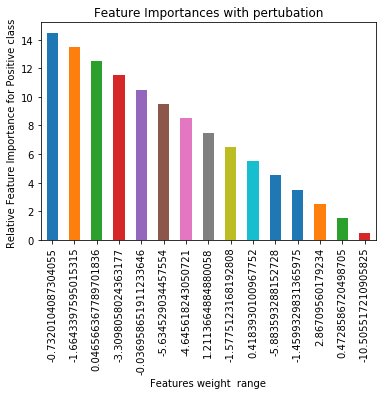

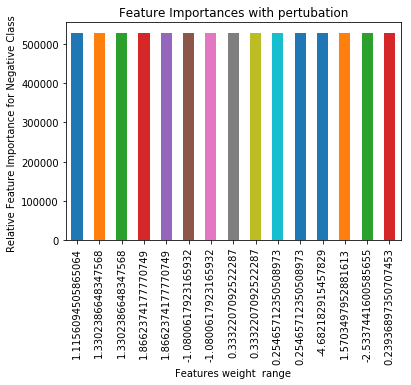

In [30]:
# Use of Pertubation Techniques for postive class and negative class using tf-idf -vect
feature_importance = 100.0 * (feature_importance / feature_importance.max())
# feature_importance# w

pos = np.arange(feature_importance.shape[0]) + .5  # 0.5 is pertubation  w`
# pos is after adding small noise in weight
print('Weight vector with pertubation',pos)
print('original Weight vector',feature_importance)


yy = [float(i) for i in feature_importance] #w

#print(yy)
vc=yy -pos
print('Difference between w and w`',vc[:20])

Pertub_pos = pd.Series(pos[:15],feature_importance[:15]).sort_values(ascending=False)
Pertub_pos.plot(kind='bar', title='Feature Importances with pertubation')
plt.xlabel('Features weight  range')
plt.ylabel('Relative Feature Importance for Positive class ')
plt.show()

Pertub_neg = pd.Series(pos[-15:],feature_importance[-15:]).sort_values(ascending=False)
Pertub_neg.plot(kind='bar', title='Feature Importances with pertubation')
plt.xlabel('Features weight  range')
plt.ylabel('Relative Feature Importance for Negative Class ')
plt.show()


##### Pertubation
* Pertubation Techniques for positive features and Negative features are used to check collinearity of features.
* If weight vector of features can change arbitrarily ,It means weight vector can not be used as feature Importance .
* Here,If Original weight vector and pertubated weight vector for respective features differ significantly,then we can't use weight vector (respective feature) for feature importance in particular class.
* In Feature Importance for positive class,[ "great" ,"love","and"] has high importance while ["are","love this","my"] has low importance and In pertubated Feature Importance, ["are" ,"my"] has low importance. This means that we can remove it's Importance from Positive class.
* Here,if positive feature or negative feature (words) are pertubated,then we can check whether a particular feature is important or not.
* All features are highly important in negative class. Also for pertubated Feature Importance ,all negative features are highly important so Feature .
* Importance for negative class doesn't change with small change in weight vector value.Finally,it is concluded that negative Feature Importance are highly important while positive Feature Importance are not.


# Conclusions

|       Model       |Vectorizer|   SearchCV   |Best penalty|Optimal lambda|Training error|Test error|Accuracy| F1  |recall|precision|
|-------------------|----------|--------------|------------|-------------|-------------|---------|-------|----|-----|--------|
|Logistic Regression|BoW       |GridSearchCV  |l2          |        1.0000|        0.0000|     19.84|  0.8016|76.97| 76.52|    77.52|
|Logistic Regression|BOW       |RandomsearchCV|l2          |        0.0042|        0.4469|     15.40|  0.8460|81.63| 80.40|    83.53|
|Logistic Regression|BOW       |GridSearchCV  |l1          |        1.0000|        0.0251|     17.92|  0.8207|79.29| 78.92|    79.71|
|Logistic Regression|BOW       |RandomsearchCV|l1          |        0.0005|        0.8235|     14.95|  0.8505|81.71| 79.89|    85.13|
|Logistic Regression|TF-IDF    |RandomsearchCV|l2          |        0.0004|        0.8435|     15.09|  0.8491|81.44| 79.54|    85.17|
|Logistic Regression|TF-IDF    |GridSearchCV  |l2          |        1.0000|        0.0000|     18.05|  0.8195|75.92| 73.43|    85.57|
|Logistic Regression|TF-IDF    |RandomsearchCV|l1          |        2.8581|        0.0000|     13.60|  0.8640|83.58| 81.94|    86.32|
|Logistic Regression|TF-IDF    |GridSearchCV  |l1          |       59.9484|        0.0000|     16.13|  0.8387|79.42| 77.03|    85.67|

* Above Table shows the performance of trained and tested model with Logistic Regression.
* Confusion matrix and scoring metrics values for TF-IDF with RandomSearch CV & L1 regularization is comparatively best with other trained model.
* After  comparing the developed models, Logistic Regression model with TF-IDF with RandomsearchCV ,l1 regularization works the best to predict the polarity of reviews among all models. 